# Initialization

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from scipy import stats
from datetime import datetime, timedelta
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as ms
import time

**The main data table was chosen as "bank-additional-full" because the number of features(columns) are more in this file. It was thought that a more truthfull and more succesfull result would be obtained in machine learning with data containing more columns or features.**

In [2]:
df2 = pd.read_csv("bank-additional-full.csv",sep=';')
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df2.shape

(41188, 21)

# Deleting Outliers 

In [6]:
def IQR_outliers(df, column):

     Q1 = df[column].quantile(0.25)
     Q3 = df[column].quantile(0.75)
     IQR = Q3 - Q1
     df = df.loc[lambda df: ~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
     return df
     
def Box_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.title("Box Plot")
  sns.boxplot(df, color= clr)
  plt.show()

def hist_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.hist(df, color =clr)
  plt.title("Histogram Plot")
  plt.show()

def dist_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.title("Distribution Plot")
  sns.distplot(df,color= clr)
  sns.despine()
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


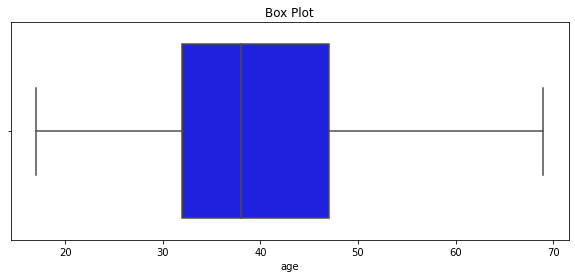

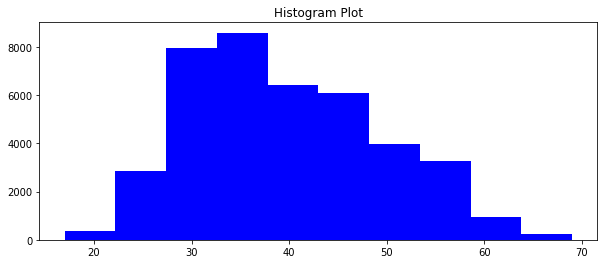

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


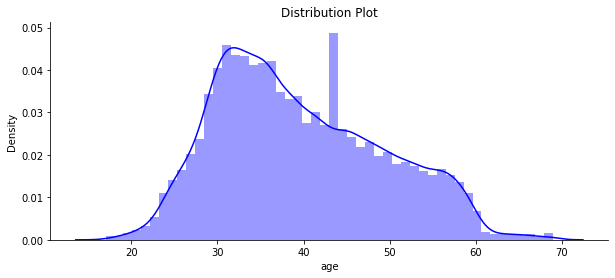

In [7]:
df2 = df2.pipe(IQR_outliers, 'age')
Box_plots(df2["age"],"blue")
hist_plots(df2["age"],"blue")
dist_plots(df2["age"],"blue")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


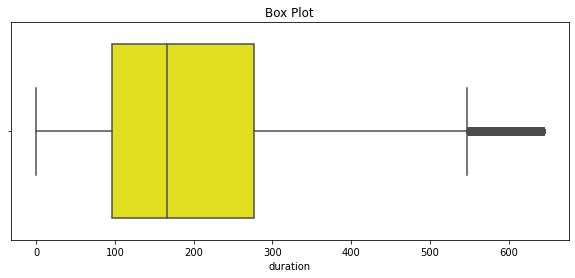

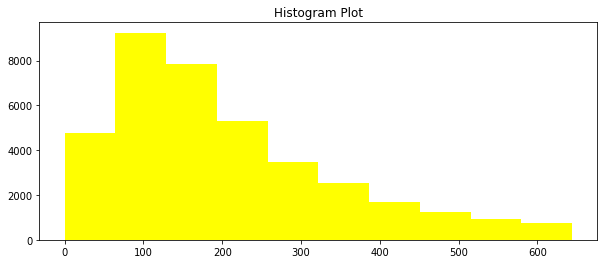

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


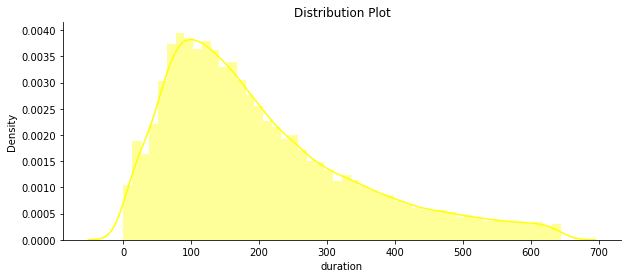

In [8]:
df2 = df2.pipe(IQR_outliers, 'duration')
Box_plots(df2["duration"],"yellow")
hist_plots(df2["duration"],"yellow")
dist_plots(df2["duration"],"yellow")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


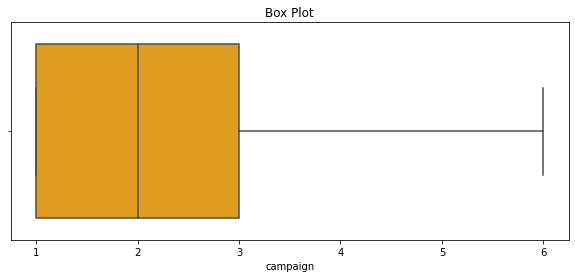

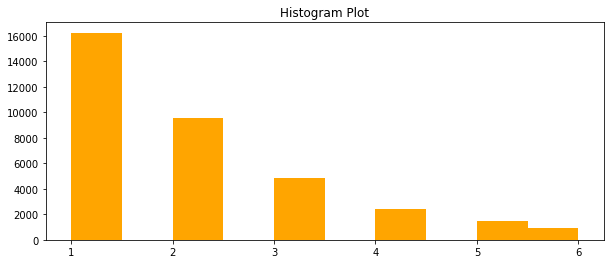

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


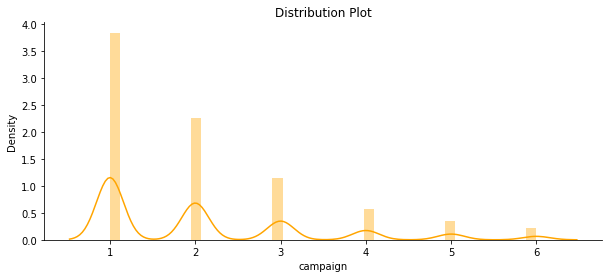

In [9]:
df2 = df2.pipe(IQR_outliers, 'campaign')
Box_plots(df2["campaign"],"orange")
hist_plots(df2["campaign"],"orange")
dist_plots(df2["campaign"],"orange")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


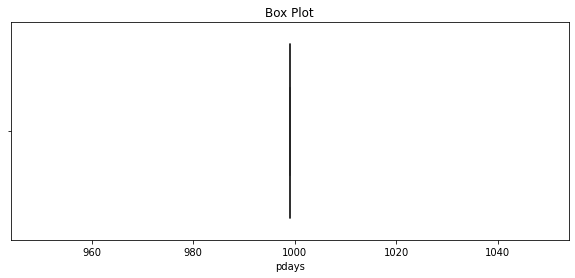

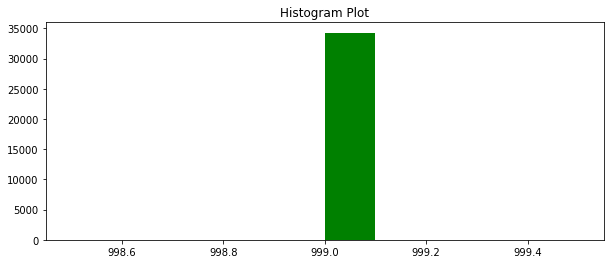

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


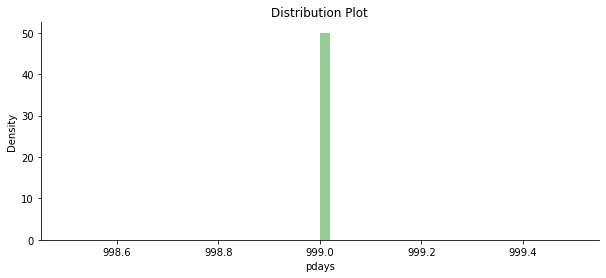

In [10]:
df2 = df2.pipe(IQR_outliers, 'pdays')
Box_plots(df2["pdays"],"green")
hist_plots(df2["pdays"],"green")
dist_plots(df2["pdays"],"green")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


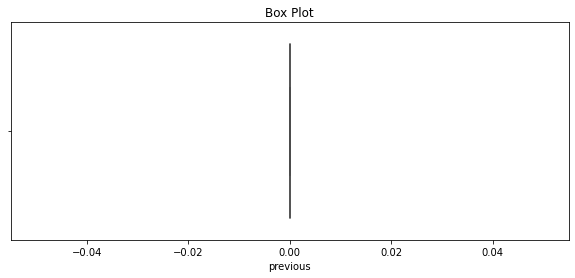

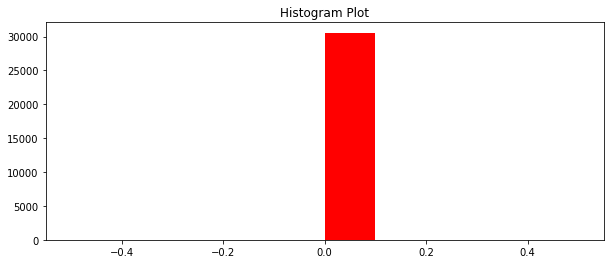

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


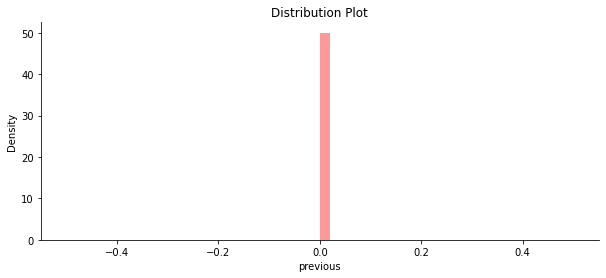

In [11]:
df2 = df2.pipe(IQR_outliers, 'previous')
Box_plots(df2["previous"],"red")
hist_plots(df2["previous"],"red")
dist_plots(df2["previous"],"red")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


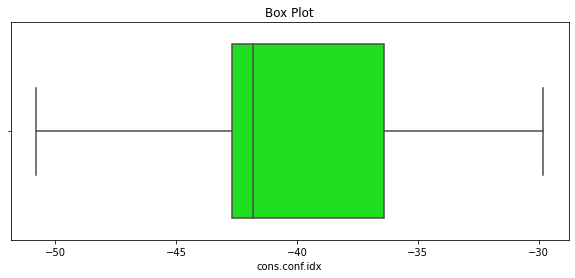

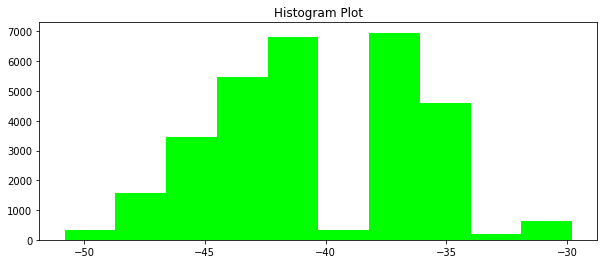

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


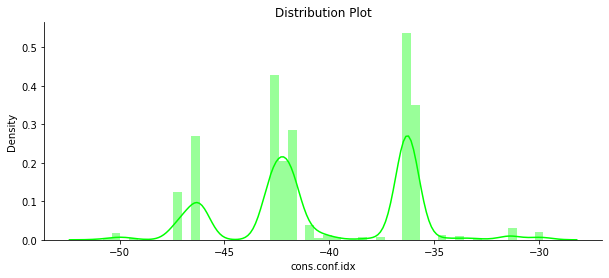

In [12]:
df2 = df2.pipe(IQR_outliers, 'cons.conf.idx')
Box_plots(df2["cons.conf.idx"],"lime")
hist_plots(df2["cons.conf.idx"],"lime")
dist_plots(df2["cons.conf.idx"],"lime")

# **Machine Learning Models**

## Encoding Categorical values

In [13]:
features = [col for col in df2.columns if col != "y"]
len(features)

20

In [14]:
cat_cols = ['job',
            'marital',
            'education',
            'default',
            'housing',
            'loan',
            'contact',
            'month',
            'day_of_week',
            'poutcome']
num_cols = [col for col in features if col not in cat_cols]

In [15]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [16]:
# check categorical features' unique values

for column in cat_cols:
    print(column, ":", df2[column].unique())

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['no' 'yes' 'unknown']
loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome : ['nonexistent']


In [17]:
X=df2.iloc[:,:20].values
Y=df2.iloc[:,20].values
Hepsi=df2.iloc

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
le1=preprocessing.LabelEncoder()
Hepsi[:,1]=le1.fit_transform(Hepsi[:,1])
le2=preprocessing.LabelEncoder()
Hepsi[:,2]=le2.fit_transform(Hepsi[:,2])
le3=preprocessing.LabelEncoder()
Hepsi[:,3]=le3.fit_transform(Hepsi[:,3])
le4=preprocessing.LabelEncoder()
Hepsi[:,4]=le4.fit_transform(Hepsi[:,4])
le5=preprocessing.LabelEncoder()
Hepsi[:,5]=le5.fit_transform(Hepsi[:,5])
le6=preprocessing.LabelEncoder()
Hepsi[:,6]=le6.fit_transform(Hepsi[:,6])
le7=preprocessing.LabelEncoder()
Hepsi[:,7]=le7.fit_transform(Hepsi[:,7])
le8=preprocessing.LabelEncoder()
Hepsi[:,8]=le8.fit_transform(Hepsi[:,8])
le9=preprocessing.LabelEncoder()
Hepsi[:,9]=le9.fit_transform(Hepsi[:,9])
le14=preprocessing.LabelEncoder()
Hepsi[:,14]=le14.fit_transform(Hepsi[:,14])
le20=preprocessing.LabelEncoder()
Hepsi[:,20]=le20.fit_transform(Hepsi[:,20])

In [20]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,0,1,6,0,0,0,0,7,0,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37,0,1,6,0,2,0,0,7,0,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0


## Feature importance

In [21]:
df2.drop('duration', axis=1, inplace=True)

In [22]:
df2.shape

(30360, 20)

In [23]:
x=df2.drop(["y"],axis=1)
y=df2["y"]

In [24]:
X_l=df2.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
X_l=np.array(X_l,dtype=float)
model=ms.OLS(y,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     355.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:19:49   Log-Likelihood:                 4545.7
No. Observations:               30360   AIC:                            -9057.
Df Residuals:                   30343   BIC:                            -8916.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           4.09e-05      0.000      0.292      0.770      -0.000       0.000
x2            -0.0003      0.000     -0.898      0.369      -0.001       0.000
x3             0.0076      0.002      3.541      0.000       0.003       0.012
x4             0.0030      0.001      5.159      0.000       0.002       0.004
x5            -0.0117      0.003     -3.897      0.000      -0.018      -0.006
x6             0.0005      0.001      0.394      0.693      -0.002       0.003
x7            -0.0018      0.002     -1.116      0.264      -0.005       0.001
x8            -0.0696      0.004    -17.416      0.000      -0.077      -0.062
x9            -0.0181      0.001    -23.495      0.000      -0.020      -0.017
x10            0.0032      0.001      3.670      0.000       0.001       0.005
x11           -0.0012      0.001     -1.295      0.195      -0.003       0.001
const         -0.0029      0.001     -2.796      0.005      -0.005      -0.001
x12        -5.504e-17   2.05e-18    -26.878      0.000    -5.9e-17    -5.1e-17
x13        -2.323e-16   7.26e-18    -32.021      0.000   -2.47e-16   -2.18e-16
x14           -0.1593      0.005    -29.141      0.000      -0.170      -0.149
x15            0.1326      0.007     20.234      0.000       0.120       0.145
x16            0.0024      0.001      4.282      0.000       0.001       0.004
x17            0.1375      0.007     18.972      0.000       0.123       0.152
x18           -0.0019      0.000    -16.040      0.000      -0.002      -0.002
==============================================================================
Omnibus:                    19708.483   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           206832.181
Skew:                           3.097   Prob(JB):                         0.00
Kurtosis:                      14.187   Cond. No.                     2.27e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [95]:
X_l=df2.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
X_l=np.array(X_l,dtype=float)
model=ms.OLS(y,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     379.5
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:23:57   Log-Likelihood:                 4545.7
No. Observations:               30360   AIC:                            -9059.
Df Residuals:                   30344   BIC:                            -8926.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0003      0.000     -0.897      0.370      -0.001       0.000
x2             0.0074      0.002      3.690      0.000       0.003       0.011
x3             0.0030      0.001      5.150      0.000       0.002       0.004
x4            -0.0116      0.003     -3.907      0.000      -0.017      -0.006
x5             0.0005      0.001      0.395      0.693      -0.002       0.003
x6            -0.0018      0.002     -1.117      0.264      -0.005       0.001
x7            -0.0697      0.004    -17.424      0.000      -0.077      -0.062
x8            -0.0181      0.001    -23.532      0.000      -0.020      -0.017
x9             0.0032      0.001      3.663      0.000       0.001       0.005
x10           -0.0012      0.001     -1.292      0.196      -0.003       0.001
const         -0.0029      0.001     -2.794      0.005      -0.005      -0.001
x11        -6.795e-17   2.71e-18    -25.063      0.000   -7.33e-17   -6.26e-17
x12         4.448e-17   2.04e-18     21.807      0.000    4.05e-17    4.85e-17
x13           -0.1593      0.005    -29.182      0.000      -0.170      -0.149
x14            0.1326      0.007     20.236      0.000       0.120       0.145
x15            0.0024      0.001      4.298      0.000       0.001       0.004
x16            0.1375      0.007     18.994      0.000       0.123       0.152
x17           -0.0019      0.000    -16.044      0.000      -0.002      -0.002
==============================================================================
Omnibus:                    19708.627   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           206837.160
Skew:                           3.097   Prob(JB):                         0.00
Kurtosis:                      14.187   Cond. No.                     9.71e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.98e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
X_l=df2.iloc[:,[1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
X_l=np.array(X_l,dtype=float)
model=ms.OLS(y,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     406.6
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:24:17   Log-Likelihood:                 4545.6
No. Observations:               30360   AIC:                            -9061.
Df Residuals:                   30345   BIC:                            -8936.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0003      0.000     -0.894      0.372      -0.001       0.000
x2             0.0074      0.002      3.692      0.000       0.003       0.011
x3             0.0030      0.001      5.151      0.000       0.002       0.004
x4            -0.0116      0.003     -3.905      0.000      -0.017      -0.006
x5            -0.0018      0.002     -1.100      0.272      -0.005       0.001
x6            -0.0697      0.004    -17.435      0.000      -0.078      -0.062
x7            -0.0181      0.001    -23.540      0.000      -0.020      -0.017
x8             0.0032      0.001      3.664      0.000       0.001       0.005
x9            -0.0012      0.001     -1.293      0.196      -0.003       0.001
const         -0.0029      0.001     -2.781      0.005      -0.005      -0.001
x10        -5.787e-18   2.07e-18     -2.798      0.005   -9.84e-18   -1.73e-18
x11        -1.507e-16   4.65e-18    -32.408      0.000    -1.6e-16   -1.42e-16
x12           -0.1593      0.005    -29.181      0.000      -0.170      -0.149
x13            0.1325      0.007     20.237      0.000       0.120       0.145
x14            0.0024      0.001      4.288      0.000       0.001       0.004
x15            0.1376      0.007     19.003      0.000       0.123       0.152
x16           -0.0019      0.000    -16.060      0.000      -0.002      -0.002
==============================================================================
Omnibus:                    19708.464   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           206826.668
Skew:                           3.097   Prob(JB):                         0.00
Kurtosis:                      14.187   Cond. No.                     2.48e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [97]:
X_l=df2.iloc[:,[2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
X_l=np.array(X_l,dtype=float)
model=ms.OLS(y,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     437.9
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:24:34   Log-Likelihood:                 4545.2
No. Observations:               30360   AIC:                            -9062.
Df Residuals:                   30346   BIC:                            -8946.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0074      0.002      3.682      0.000       0.003       0.011
x2             0.0030      0.001      5.077      0.000       0.002       0.004
x3            -0.0116      0.003     -3.903      0.000      -0.017      -0.006
x4            -0.0018      0.002     -1.088      0.276      -0.005       0.001
x5            -0.0697      0.004    -17.438      0.000      -0.078      -0.062
x6            -0.0181      0.001    -23.526      0.000      -0.020      -0.017
x7             0.0032      0.001      3.659      0.000       0.001       0.005
x8            -0.0012      0.001     -1.286      0.199      -0.003       0.001
const         -0.0029      0.001     -2.792      0.005      -0.005      -0.001
x9          6.655e-16   2.08e-17     32.037      0.000    6.25e-16    7.06e-16
x10          2.19e-15   6.77e-17     32.335      0.000    2.06e-15    2.32e-15
x11           -0.1594      0.005    -29.189      0.000      -0.170      -0.149
x12            0.1325      0.007     20.248      0.000       0.120       0.145
x13            0.0024      0.001      4.276      0.000       0.001       0.004
x14            0.1376      0.007     19.001      0.000       0.123       0.152
x15           -0.0019      0.000    -16.053      0.000      -0.002      -0.002
==============================================================================
Omnibus:                    19708.236   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           206818.354
Skew:                           3.097   Prob(JB):                         0.00
Kurtosis:                      14.186   Cond. No.                     3.29e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.8e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [98]:
X_l=df2.iloc[:,[2,3,4,7,8,9,10,11,12,13,14,15,16,17,18]].values
X_l=np.array(X_l,dtype=float)
model=ms.OLS(y,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     474.3
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:24:50   Log-Likelihood:                 4544.6
No. Observations:               30360   AIC:                            -9063.
Df Residuals:                   30347   BIC:                            -8955.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0074      0.002      3.673      0.000       0.003       0.011
x2             0.0030      0.001      5.072      0.000       0.002       0.004
x3            -0.0116      0.003     -3.905      0.000      -0.017      -0.006
x4            -0.0697      0.004    -17.434      0.000      -0.078      -0.062
x5            -0.0181      0.001    -23.537      0.000      -0.020      -0.017
x6             0.0032      0.001      3.674      0.000       0.001       0.005
x7            -0.0012      0.001     -1.295      0.195      -0.003       0.001
const         -0.0029      0.001     -2.792      0.005      -0.005      -0.001
x8         -9.172e-18   1.39e-18     -6.589      0.000   -1.19e-17   -6.44e-18
x9         -5.418e-17   2.04e-18    -26.517      0.000   -5.82e-17   -5.02e-17
x10           -0.1594      0.005    -29.204      0.000      -0.170      -0.149
x11            0.1325      0.007     20.251      0.000       0.120       0.145
x12            0.0024      0.001      4.275      0.000       0.001       0.004
x13            0.1377      0.007     19.014      0.000       0.123       0.152
x14           -0.0019      0.000    -16.059      0.000      -0.002      -0.002
==============================================================================
Omnibus:                    19709.308   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           206852.500
Skew:                           3.097   Prob(JB):                         0.00
Kurtosis:                      14.187   Cond. No.                     2.21e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
X_l=df2.iloc[:,[2,3,4,7,8,9,11,12,13,14,15,16,17,18]].values
X_l=np.array(X_l,dtype=float)
model=ms.OLS(y,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     517.2
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        08:37:09   Log-Likelihood:                 4543.8
No. Observations:               30360   AIC:                            -9064.
Df Residuals:                   30348   BIC:                            -8964.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0074      0.002      3.674      0.000       0.003       0.011
x2             0.0029      0.001      5.057      0.000       0.002       0.004
x3            -0.0116      0.003     -3.907      0.000      -0.017      -0.006
x4            -0.0698      0.004    -17.466      0.000      -0.078      -0.062
x5            -0.0182      0.001    -23.569      0.000      -0.020      -0.017
x6             0.0032      0.001      3.741      0.000       0.002       0.005
const         -0.0029      0.001     -2.762      0.006      -0.005      -0.001
x7          1.381e-16   4.28e-18     32.276      0.000     1.3e-16    1.46e-16
x8         -1.431e-17   8.63e-19    -16.582      0.000    -1.6e-17   -1.26e-17
x9            -0.1599      0.005    -29.379      0.000      -0.171      -0.149
x10            0.1326      0.007     20.253      0.000       0.120       0.145
x11            0.0024      0.001      4.253      0.000       0.001       0.004
x12            0.1384      0.007     19.163      0.000       0.124       0.153
x13           -0.0019      0.000    -16.141      0.000      -0.002      -0.002
==============================================================================
Omnibus:                    19711.770   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           206944.750
Skew:                           3.097   Prob(JB):                         0.00
Kurtosis:                      14.190   Cond. No.                     4.58e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.03e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
df2.iloc[:,[2,3,4,7,8,9,11,12,13,14,15,16,17,18]]

,marital,education,default,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,0,0,1,6,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
1,1,3,1,1,6,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
2,1,3,0,1,6,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
3,1,1,0,1,6,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
4,1,3,0,1,6,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,1,6,0,0,7,0,999,0,0,-1.1,94.767,-50.8,1.028,4963.6
41181,1,6,0,0,7,0,999,0,0,-1.1,94.767,-50.8,1.028,4963.6
41184,1,5,0,0,7,0,999,0,0,-1.1,94.767,-50.8,1.028,4963.6
41185,1,6,0,0,7,0,999,0,0,-1.1,94.767,-50.8,1.028,4963.6


In [26]:
x=df2.iloc[:,[2,3,4,7,8,9,11,12,13,14,15,16,17,18]].values

## Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, train_size = 0.75, random_state = 41)
X_train.shape, X_test.shape

((22770, 14), (7590, 14))

In [28]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_transformed=sc.fit_transform(X_train)
X_test_transformed=sc.transform(X_test)

## Model testing Linear-Non Linear Algorithms

In [29]:
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
import statistics

In [32]:
# linear-non linear models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


kfold = KFold(n_splits=10,shuffle=True, random_state=42)
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.825614 (0.023207)
LDA: 0.830651 (0.020612)
KNN: 0.773613 (0.023928)
CART: 0.683284 (0.026820)
NB: 0.835635 (0.020814)


In [33]:
model = LogisticRegression()
model.fit(X_train_transformed, y_train)

# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.05533596837944664
0.9446640316205533


roc_auc_score for LDA:  0.5


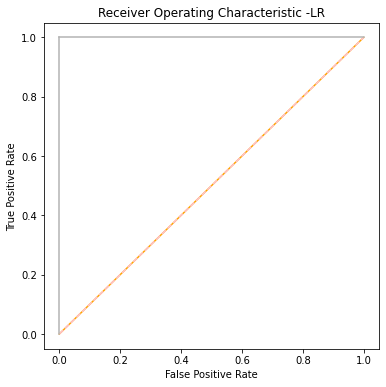

In [34]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for LR: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic -LR')
plt.plot(false_positive_rate1, true_positive_rate1,color="orange")
plt.plot([0, 1], ls="--", color="pink")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Tuning for Linear Discriminant Analysis

In [112]:
model = LinearDiscriminantAnalysis()
model.fit(X_train_transformed, y_train)

# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.06982872200263504
0.930171277997365


roc_auc_score for LDA:  0.5


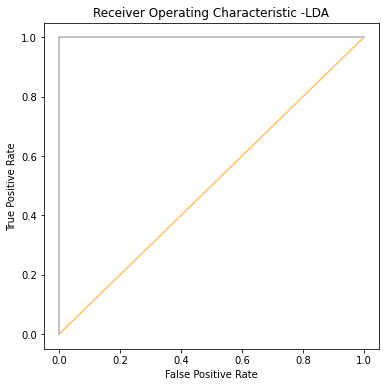

In [113]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for LDA: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic -LDA')
plt.plot(false_positive_rate1, true_positive_rate1,color="gold")
plt.plot([0, 1], ls="--", color="pink")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
search = GridSearchCV(LinearDiscriminantAnalysis(), grid, scoring='roc_auc', cv=kfold, n_jobs=-1)
results = search.fit(X_train, y_train)
print('Best Score: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 603, in fit
    covariance_estimator=self.covariance_estimator,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 440, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/usr/local/li

Best Score: 0.792
Config: {'solver': 'svd'}


### Tuning for K Neighbors Classifier

In [114]:
model = KNeighborsClassifier()
model.fit(X_train_transformed, y_train)

# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.05836627140974967
0.9416337285902503


roc_auc_score for KNN:  0.4908026755852843


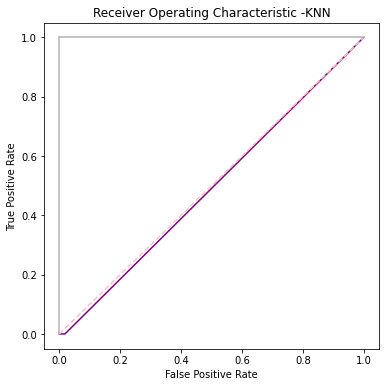

In [115]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic -KNN')
plt.plot(false_positive_rate1, true_positive_rate1,color="purple")
plt.plot([0, 1], ls="--", color="pink")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch

kfold = KFold(n_splits=10,shuffle=True, random_state=42)
clf = GridSearchCV(knn_2, hyperparameters,  cv=kfold,scoring='roc_auc')
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

### Tuning for Decision Tree Classifier

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(DecisionTreeClassifier(), 
                           param_grid=params, 
                           cv=kfold, n_jobs=-1, verbose=1, scoring = "roc_auc")
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

In [ ]:
# Space
space = {    
    'max_depth' : hp.choice('max_depth', [2, 3, 5, 10, 20]), 
    'min_samples_leaf' : hp.choice('min_samples_leaf', [5, 10, 20, 50, 100]),
    'criterion' : hp.choice('criterion', ["gini", "entropy"]),
}
# Set up the k-fold cross-validation
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
# Objective function
def objective(params):
    
    tree = DecisionTreeClassifier( **params)
    scores = cross_val_score(tree, X_train_transformed, y_train, cv=kfold, scoring='roc_auc', n_jobs=-1)
    # Extract the best score
    best_mean_score = statistics.mean(scores)
    # Loss must be minimized
    loss = - best_mean_score
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
# Trials to track progress
bayes_trials = Trials()
# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 48, trials = bayes_trials)

100%|██████████| 48/48 [00:57<00:00,  1.20s/it, best loss: -0.7880728011892033]


In [ ]:
# Print the values of the best parameters
print(space_eval(space, best))

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}


In [116]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 20)
model.fit(X_train_transformed, y_train)

# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))


0.05217391304347826
0.9478260869565217


roc_auc_score for Decision Tree:  0.44586221382062596


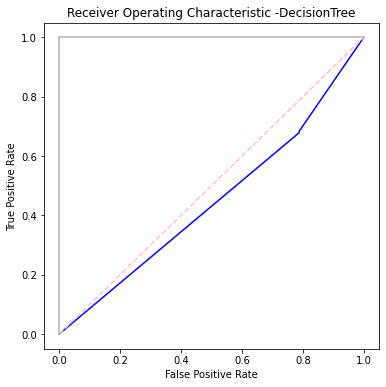

In [117]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for Decision Tree: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic -DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1,color="blue")
plt.plot([0, 1], ls="--", color="pink")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
model = DecisionTreeClassifier()
model.fit(X_train_transformed, y_train)

# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.060474308300395255
0.9395256916996048


roc_auc_score for Decision Tree:  0.6204240584557219


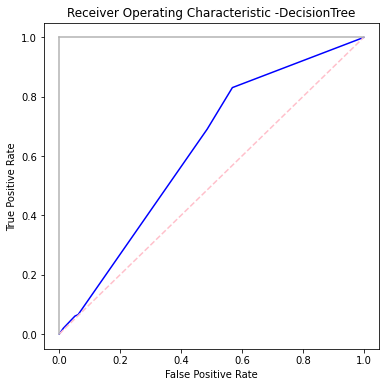

In [119]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for Decision Tree: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic -DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1,color="blue")
plt.plot([0, 1], ls="--", color="pink")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Tuning for Naive Bayes

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=kfold, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=5.3366992312063123e-05)


In [120]:
model = GaussianNB(var_smoothing=5.3366992312063123e-05)
model.fit(X_train_transformed, y_train)

# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))


0.18405797101449275
0.8159420289855073


roc_auc_score for Naive Bayes:  0.5


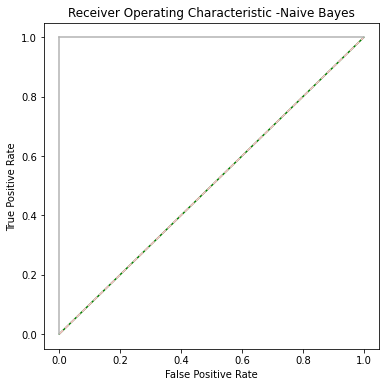

In [121]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic -Naive Bayes')
plt.plot(false_positive_rate1, true_positive_rate1,color="green")
plt.plot([0, 1], ls="--", color="pink")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [122]:
model = GaussianNB()
model.fit(X_train_transformed, y_train)

# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.18405797101449275
0.8159420289855073


roc_auc_score for Naive Bayes:  0.5


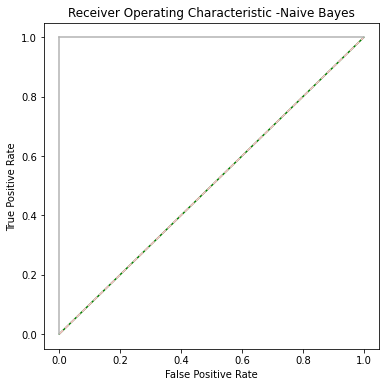

In [123]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic -Naive Bayes')
plt.plot(false_positive_rate1, true_positive_rate1,color="green")
plt.plot([0, 1], ls="--", color="pink")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model testing Ensemble Methods

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [129]:
# ensemble models
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('XGB', XGBClassifier()))

results = []
names = []

kfold = KFold(n_splits=10,shuffle=True, random_state=42)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.860184 (0.021476)
GBM: 0.863318 (0.020106)
RF: 0.812896 (0.025039)
ET: 0.753375 (0.022862)
XGB: 0.864068 (0.020986)


In [124]:
model = ExtraTreesClassifier()
model.fit(X_train_transformed, y_train)

# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.05836627140974967
0.9416337285902503


roc_auc_score for ET:  0.7101479569579758


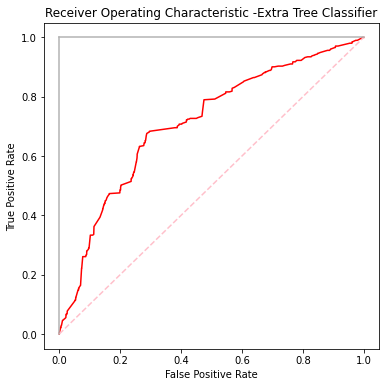

In [125]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for ET: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic -Extra Tree Classifier')
plt.plot(false_positive_rate1, true_positive_rate1,color="red")
plt.plot([0, 1], ls="--", color="pink")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [126]:
model = RandomForestClassifier()
model.fit(X_train_transformed, y_train)

# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.05704874835309618
0.9429512516469039


roc_auc_score for RF:  0.7045091932851857


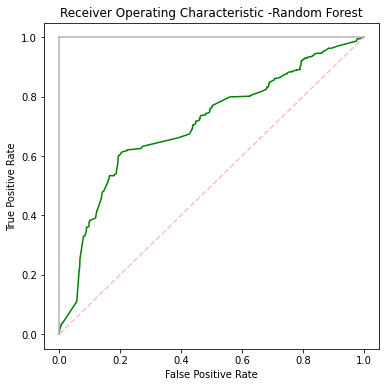

In [128]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for RF: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic -Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1,color="green")
plt.plot([0, 1], ls="--", color="pink")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Tuning for Ada Boost

In [47]:
start = time.time()
model = AdaBoostClassifier(n_estimators=260,learning_rate=1.3)
model.fit(X_train_transformed, y_train)

# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))
end = time.time()

print("Process time(in seconds): ",end - start)

0.05349143610013175
0.9465085638998683
Process time(in seconds):  4.614392042160034


roc_auc_score for ADA Boost:  0.7307587960943348


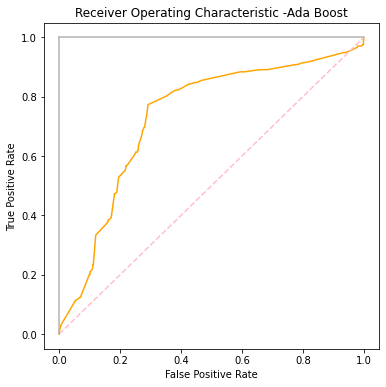

In [167]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for ADA Boost: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic -Ada Boost')
plt.plot(false_positive_rate1, true_positive_rate1,color="orange")
plt.plot([0, 1], ls="--", color="pink")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [168]:
model = AdaBoostClassifier()
model.fit(X_train_transformed, y_train)

# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.05349143610013175
0.9465085638998683


roc_auc_score for ADA Boost:  0.7258312733265474


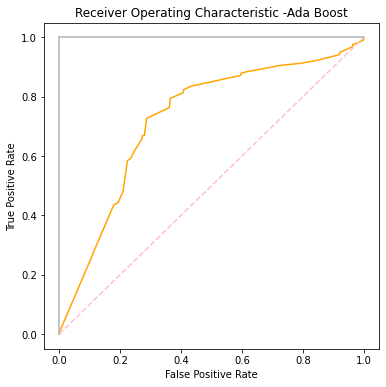

In [169]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for ADA Boost: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic -Ada Boost')
plt.plot(false_positive_rate1, true_positive_rate1,color="orange")
plt.plot([0, 1], ls="--", color="pink")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

>0.100 0.786 (0.013)
>0.200 0.790 (0.014)
>0.300 0.792 (0.014)
>0.400 0.794 (0.014)
>0.500 0.795 (0.014)
>0.600 0.796 (0.014)
>0.700 0.796 (0.015)
>0.800 0.796 (0.015)
>0.900 0.796 (0.014)
>1.000 0.796 (0.015)
>1.100 0.797 (0.014)
>1.200 0.799 (0.015)
>1.300 0.799 (0.015)
>1.400 0.797 (0.014)
>1.500 0.799 (0.014)
>1.600 0.798 (0.014)
>1.700 0.797 (0.014)
>1.800 0.797 (0.008)
>1.900 0.791 (0.015)
>2.000 0.504 (0.203)


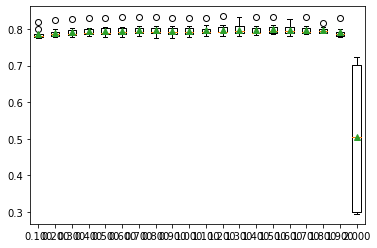

In [ ]:
from numpy import mean
from numpy import std
from numpy import arange
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore learning rates from 0.1 to 2 in 0.1 increments
	for i in arange(0.1, 2.1, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# evaluate the model and collect the results
	scores = cross_val_score(model,X, y, scoring='roc_auc', cv=kfold, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model,X_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

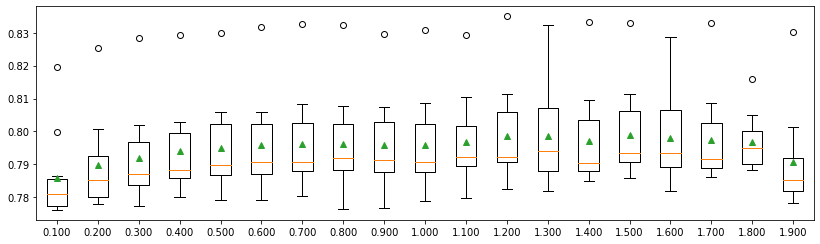

In [ ]:
plt.rcParams["figure.figsize"] = [11.50, 3.50]
plt.rcParams["figure.autolayout"] = True

ax=plt.boxplot(results[:19], labels=names[:19], showmeans=True)
plt.show()

In [ ]:
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.rcParams["figure.figsize"] = [11.50, 3.50]
plt.rcParams["figure.autolayout"] = True

ax=plt.boxplot(results, labels=names, showmeans=True)
plt.show()

>10 0.787 (0.013)
>50 0.796 (0.015)
>100 0.798 (0.015)
>500 0.802 (0.015)
>1000 0.802 (0.015)


KeyboardInterrupt: ignored

>1 0.796 (0.015)
>2 0.798 (0.011)
>3 0.777 (0.011)
>4 0.741 (0.014)
>5 0.707 (0.012)
>6 0.660 (0.016)
>7 0.648 (0.020)
>8 0.660 (0.013)
>9 0.691 (0.022)
>10 0.702 (0.016)


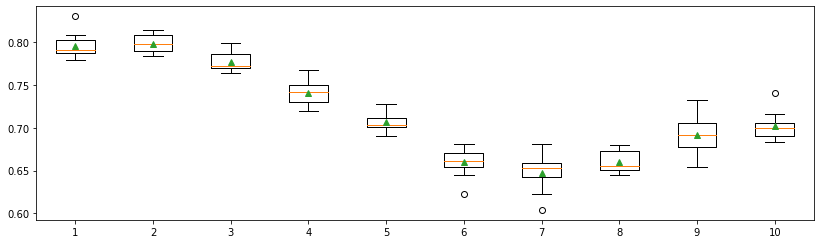

In [ ]:
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,11):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models

models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.rcParams["figure.figsize"] = [11.50, 3.50]
plt.rcParams["figure.autolayout"] = True

ax=plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [43]:
start = time.time()
# trying ada boost hyperparameters
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('AB with hyperparameters', AdaBoostClassifier(n_estimators=270,learning_rate=1.5)))

results = []
names = []
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
end = time.time()

print("Process time(in seconds): ",end - start)

AB: 0.860184 (0.021476)
AB with hyperparameters: 0.859942 (0.020814)
Process time(in seconds):  47.62847185134888


Since hypermarameters were investigated seperately their affect on the result is much different while other parameters take place as well. So, lets try them while they are together with GridSearch.

In [ ]:
params = {
     'n_estimators': np.arange(10,300,10),
     'learning_rate': [0.01, 0.05, 0.1,0.15 1,1.5]
 }
# Instantiate the grid search model
grid_search = GridSearchCV(AdaBoostClassifier(), 
                           param_grid=params, 
                           cv=kfold, n_jobs=-1, verbose=1, scoring = "roc_auc")
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

In [145]:
# Space
space = {
    'learning_rate': hp.choice('learning_rate', [0.01, 0.05, 0.1,0.15, 1,1.5]),
    'n_estimators' : hp.choice('n_estimators', range(10,300,10)),
}
# Set up the k-fold cross-validation
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
# Objective function
def objective(params):
    
    ada = AdaBoostClassifier( **params)
    scores = cross_val_score(ada, X_train_transformed, y_train, cv=kfold, scoring='roc_auc', n_jobs=-1)
    # Extract the best score
    best_mean_score = statistics.mean(scores)
    # Loss must be minimized
    loss = - best_mean_score
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
# Trials to track progress
bayes_trials = Trials()
# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 48, trials = bayes_trials)

100%|██████████| 48/48 [14:58<00:00, 18.72s/it, best loss: -0.8617788095749611]


In [146]:
# Print the values of the best parameters
print(space_eval(space, best))

{'learning_rate': 1, 'n_estimators': 260}


### Tuning for XG Boost

In [170]:
model = XGBClassifier()
model.fit(X_train_transformed, y_train)
# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.05454545454545454
0.9454545454545454


roc_auc_score for XGBoost:  0.6013169906128317


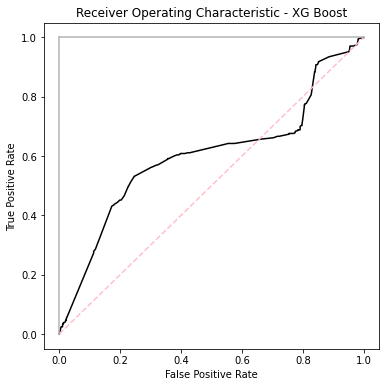

In [171]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for XGBoost: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - XG Boost')
plt.plot(false_positive_rate1, true_positive_rate1,color="black")
plt.plot([0, 1], ls="--", color="pink")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
start = time.time()
model = XGBClassifier(colsample_bytree= 0.6, gamma= 0.0, 
                            learning_rate= 0.1, max_depth= 9, 
                            reg_alpha= 10, reg_lambda= 1)
model.fit(X_train_transformed, y_train)
# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))
end = time.time()

print("Process time(in seconds): ",end - start)

0.05309617918313571
0.9469038208168643
Process time(in seconds):  2.7104830741882324


roc_auc_score for XGBoost:  0.7286440914158304


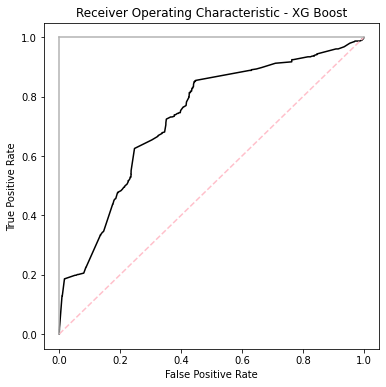

In [177]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for XGBoost: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - XG Boost')
plt.plot(false_positive_rate1, true_positive_rate1,color="black")
plt.plot([0, 1], ls="--", color="pink")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Bayesian Optimization For XGBoost**

In [172]:

# Space
space = {
    'learning_rate': hp.choice('learning_rate', [0.0001,0.001, 0.01, 0.1, 1]),
    'max_depth' : hp.choice('max_depth', range(3,21,3)),
    'gamma' : hp.choice('gamma', [i/10.0 for i in range(0,5)]),
    'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,10)]),     
    'reg_alpha' : hp.choice('reg_alpha', [1e-5, 1e-2, 0.1, 1, 10, 100]), 
    'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 100])
}
# Set up the k-fold cross-validation
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
# Objective function
def objective(params):
    
    xgboost = XGBClassifier(seed=0, **params)
    scores = cross_val_score(xgboost, X_train_transformed, y_train, cv=kfold, scoring='roc_auc', n_jobs=-1)
    # Extract the best score
    best_mean_score = statistics.mean(scores)
    # Loss must be minimized
    loss = - best_mean_score
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
# Trials to track progress
bayes_trials = Trials()
# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 48, trials = bayes_trials)

100%|██████████| 48/48 [11:38<00:00, 14.56s/it, best loss: -0.8641022398024405]


In [173]:
# Print the values of the best parameters
print(space_eval(space, best))

{'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 9, 'reg_alpha': 10, 'reg_lambda': 1}


In [44]:
start = time.time()

# trying XG boost hyperparameters
models = []
models.append(('XG Boost with parameters', XGBClassifier(colsample_bytree= 0.6, gamma= 0.0, 
                                                         learning_rate= 0.1, max_depth= 9, 
                                                         reg_alpha= 10, reg_lambda= 1)))
models.append(('XG Boost without parameters', XGBClassifier()))

results = []
names = []
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
for name, model in models:
    cv_results = cross_val_score(model, X_train_transformed, y_train, cv=kfold, scoring="roc_auc")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
end = time.time()

print("Process time(in seconds): ",end - start)

XG Boost with parameters: 0.864102 (0.022019)
XG Boost without parameters: 0.864068 (0.020986)
Process time(in seconds):  31.5082688331604


### Tuning for Gradient Boosting

In [104]:
model = GradientBoostingClassifier()
model.fit(X_train_transformed, y_train)

# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.054281949934123844
0.9457180500658762


roc_auc_score for Gradient Boost:  0.5383415397002353


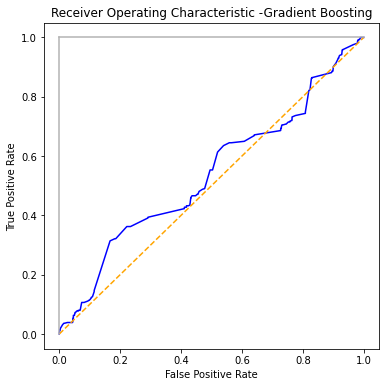

In [105]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for Gradient Boost: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic -Gradient Boosting')
plt.plot(false_positive_rate1, true_positive_rate1,color="blue")
plt.plot([0, 1], ls="--", color="orange")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [106]:
model = GradientBoostingClassifier(learning_rate= 0.03946732821123155, max_depth= 6,
                                   min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200)
model.fit(X_train_transformed, y_train)

# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.05309617918313571
0.9469038208168643


roc_auc_score for Gradient Boost:  0.6026480848668938


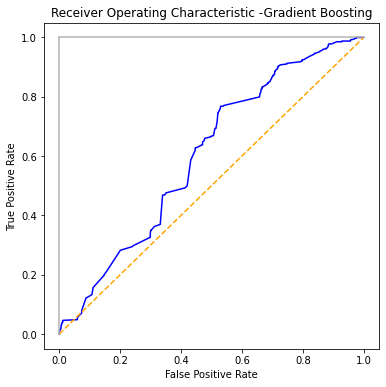

In [107]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for Gradient Boost: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic -Gradient Boosting')
plt.plot(false_positive_rate1, true_positive_rate1,color="blue")
plt.plot([0, 1], ls="--", color="orange")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import hyperopt.pyll
from hyperopt.pyll import scope
# Space
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 250, 50)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 5, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1,5, 1)),
}
# Set up the k-fold cross-validation
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
# Objective function
def objective(params):
    
    gb = GradientBoostingClassifier( random_state=42,**params)
    scores = cross_val_score(gb, X_train_transformed, y_train, cv=kfold, scoring='roc_auc', n_jobs=-1)
    # Extract the best score
    best__mean_score = statistics.mean(scores)
    # Loss must be minimized
    loss = - best__mean_score
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
# Trials to track progress
bayes_trials = Trials()
# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 48, trials = bayes_trials)

100%|██████████| 48/48 [2:44:59<00:00, 206.25s/it, best loss: -0.8053977565272622]


In [ ]:
# Print the values of the best parameters
print(space_eval(space, best))

{'learning_rate': 0.03946732821123155, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# trying Gradient Boosting
models = []
models.append(('Gradient Boosting without parameters', GradientBoostingClassifier()))

results = []
names = []
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Gradient Boosting without parameters: 0.802190 (0.019375)


### Tuning for Cat Boost

In [166]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [167]:
from catboost import CatBoostClassifier

In [168]:
model = CatBoostClassifier()
model.fit(X_train_transformed, y_train)

# transform the validation dataset
predictions = model.predict(X_test_transformed)
print(mean_squared_error(y_test, predictions))
print(accuracy_score(y_test, predictions))

Learning rate set to 0.039132
0:	learn: 0.6321804	total: 67.3ms	remaining: 1m 7s
1:	learn: 0.5789283	total: 75.1ms	remaining: 37.5s
2:	learn: 0.5292606	total: 82.2ms	remaining: 27.3s
3:	learn: 0.4859080	total: 89.5ms	remaining: 22.3s
4:	learn: 0.4482824	total: 96.9ms	remaining: 19.3s
5:	learn: 0.4146449	total: 104ms	remaining: 17.2s
6:	learn: 0.3879308	total: 111ms	remaining: 15.7s
7:	learn: 0.3624317	total: 118ms	remaining: 14.6s
8:	learn: 0.3413188	total: 125ms	remaining: 13.7s
9:	learn: 0.3233482	total: 132ms	remaining: 13.1s
10:	learn: 0.3057221	total: 141ms	remaining: 12.6s
11:	learn: 0.2922367	total: 148ms	remaining: 12.2s
12:	learn: 0.2797539	total: 155ms	remaining: 11.8s
13:	learn: 0.2664054	total: 163ms	remaining: 11.5s
14:	learn: 0.2559581	total: 170ms	remaining: 11.1s
15:	learn: 0.2454718	total: 176ms	remaining: 10.8s
16:	learn: 0.2359361	total: 183ms	remaining: 10.6s
17:	learn: 0.2281652	total: 190ms	remaining: 10.4s
18:	learn: 0.2219429	total: 206ms	remaining: 10.6s
19:	le

roc_auc_score for Cat Boosting:  0.6035979768848388


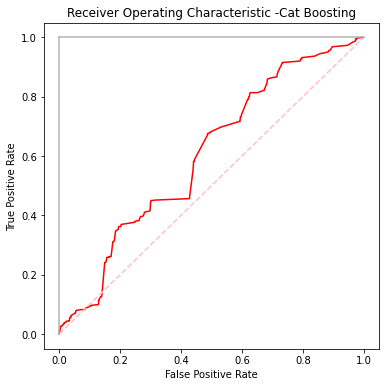

In [170]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for Cat Boosting: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic -Cat Boosting')
plt.plot(false_positive_rate1, true_positive_rate1,color="red")
plt.plot([0, 1], ls="--", color="pink")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [171]:
# trying Cat Boosting
models = []
models.append(('Cat Boosting without parameters', CatBoostClassifier()))

results = []
names = []
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
5:	learn: 0.4262622	total: 53.3ms	remaining: 8.83s
6:	learn: 0.3994446	total: 72.6ms	remaining: 10.3s
7:	learn: 0.3720381	total: 88.2ms	remaining: 10.9s
8:	learn: 0.3507534	total: 111ms	remaining: 12.2s
9:	learn: 0.3304187	total: 127ms	remaining: 12.6s
10:	learn: 0.3135152	total: 147ms	remaining: 13.2s
11:	learn: 0.2991591	total: 174ms	remaining: 14.3s
12:	learn: 0.2868577	total: 182ms	remaining: 13.8s
13:	learn: 0.2737038	total: 197ms	remaining: 13.9s
14:	learn: 0.2631411	total: 216ms	remaining: 14.2s
15:	learn: 0.2524957	total: 236ms	remaining: 14.5s
16:	learn: 0.2423992	total: 260ms	remaining: 15s
17:	learn: 0.2343484	total: 280ms	remaining: 15.2s
18:	learn: 0.2278003	total: 292ms	remaining: 15.1s
19:	learn: 0.2208372	total: 301ms	remaining: 14.8s
20:	learn: 0.2146859	total: 311ms	remaining: 14.5s
21:	learn: 0.2098154	total: 327ms	remaining: 14.5s
22:	learn: 0.2043093	total: 346ms	remaining: 14.7s
23:	learn: 0.1996559	total: 367ms	remai